<a href="https://colab.research.google.com/github/arenamichela/-CE880_Lab_Work/blob/main/Lab_1_part2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##-------------------------------------------------------------------------
Jupiter Notebook for GV918, week 5: Assignment 1 part 2.

- Registration number: 2202379
- Module Code:	GV918
- Module Title: Data for Social Data Science
- Lecturer: Matsuo, Akitaka
- Coursework Title: Assignment 1

##-------------------------------------------------------------------------


# Assignment Instruction

This is part 1 of assignment 2. It amounts to 60 percent of the grade.

In this part of the assignment, you will explore the data from the past two presidential elections in the US with the other data.  

The datasets we will use are:

1. County-level vote percentage for Donald Trump 
    - pct_2016: Trump Vote in 2016
        - source: https://www.kaggle.com/stevepalley/2016uspresidentialvotebycounty
    - pct_2020: Trump Vote in 2020
        - source: https://www.kaggle.com/unanimad/us-election-2020
        - These are temporary data, and may not be accurate
2. Covid data as of 1 October, 2020
3. County demography
    - This is the subset of the one you used in Assignment 1
    - https://www.kaggle.com/muonneutrino/us-census-demographic-data

The covid dataset is:

1. At the county level
2. Including deaths and case figures
3. On 1 Oct 2020.

"This dataset contains daily updated number of reported cases & deaths in the US on the state and county level, as provided by the Johns Hopkins University." It is downloaded from https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics

The data files are found in the following dropbox link.

**Note:** There are several points you need to take care

1. For the figures, use meaningful labels (e.g. it is not sufficient to use the variable names)
2. Write-up is very important. You need to express fluently what you intend and find. 
    1. It is not enough to simply create tables and figures. You should explain what you mean by the table or diagram (e.g. the meaning of the x-axis and y-axis and the choice of the colour scheme).
    2. Interpret the output in your own word.





In [ ]:
!wget https://www.dropbox.com/sh/kqkdaw3w99ewt2i/AAAWjcajIrGXVcho9RPES6ANa?dl=0 -O Data.zip
!unzip Data.zip -d Data

--2022-11-01 12:45:23--  https://www.dropbox.com/sh/kqkdaw3w99ewt2i/AAAWjcajIrGXVcho9RPES6ANa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/kqkdaw3w99ewt2i/AAAWjcajIrGXVcho9RPES6ANa [following]
--2022-11-01 12:45:24--  https://www.dropbox.com/sh/raw/kqkdaw3w99ewt2i/AAAWjcajIrGXVcho9RPES6ANa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc16e425db9fc380c8e81d379008.dl.dropboxusercontent.com/zip_download_get/BTV14XIkoTAt4apJbcSx8tvlZ6jbqhu225tj1P69bp6rNdB5y62eNhWZR61N2sBltu1nDxizj2WknDcV8OSU_7Ql9zUc-WQLEwKpGB0KV9FjQQ# [following]
--2022-11-01 12:45:25--  https://uc16e425db9fc380c8e81d379008.dl.dropboxusercontent.com/zip_download_get/BTV14XIkoTAt4apJbcSx8tvlZ6jbqhu225tj1P69bp6rNdB5y62eNhWZR61N2sBltu1nDxizj2WknDcV8OSU_7Ql9z

# Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read three data files and merge (10 percent)

- Open three datafiles in the Data folder and merge them.
- Also, create a variable (named `pct_diff`) that measures the difference in vote percentage from 2016 to 2019.

First, I open three datafiles in the Data folder as follows:

In [ ]:
df1  = pd.read_csv("Data/data_pres_2020.csv")
df1.head()

,st,county,state,fips,pct_2016,pct_2020,Region
0,AL,Autauga,Alabama,1001,0.734358,0.714368,South
1,AL,Baldwin,Alabama,1003,0.773515,0.761714,South
2,AL,Barbour,Alabama,1005,0.522714,0.534512,South
3,AL,Bibb,Alabama,1007,0.769662,0.784263,South
4,AL,Blount,Alabama,1009,0.898519,0.895716,South


In [ ]:
df2= pd.read_csv("Data/acs2017_county_data_sub.csv")
df2.head()

,fips,state,County,TotalPop,Hispanic,White,Black,Income,Unemployment
0,1001,Alabama,Autauga County,55036,2.7,75.4,18.9,55317,5.2
1,1003,Alabama,Baldwin County,203360,4.4,83.1,9.5,52562,5.5
2,1005,Alabama,Barbour County,26201,4.2,45.7,47.8,33368,12.4
3,1007,Alabama,Bibb County,22580,2.4,74.6,22.0,43404,8.2
4,1009,Alabama,Blount County,57667,9.0,87.4,1.5,47412,4.9


In [ ]:
df3 = pd.read_csv("Data/covid_us_county_oct2020.csv")
df3.head()

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001,Autauga,Alabama,32.539527,-86.644082,2020-10-01,1798,AL,28
1,1003,Baldwin,Alabama,30.727750,-87.722071,2020-10-01,5997,AL,53
2,1005,Barbour,Alabama,31.868263,-85.387129,2020-10-01,898,AL,7
3,1007,Bibb,Alabama,32.996421,-87.125115,2020-10-01,672,AL,10
4,1009,Blount,Alabama,33.982109,-86.567906,2020-10-01,1634,AL,15


Second, I merge the three datafiles. 

In [ ]:
df_merged= df3.merge(df1, on="fips").merge(df2, on="fips")
df_merged.head()

,fips,county_x,state_x,lat,long,date,cases,state_code,deaths,st,...,pct_2020,Region,state,County,TotalPop,Hispanic,White,Black,Income,Unemployment
0,1001,Autauga,Alabama,32.539527,-86.644082,2020-10-01,1798,AL,28,AL,...,0.714368,South,Alabama,Autauga County,55036,2.7,75.4,18.9,55317,5.2
1,1003,Baldwin,Alabama,30.727750,-87.722071,2020-10-01,5997,AL,53,AL,...,0.761714,South,Alabama,Baldwin County,203360,4.4,83.1,9.5,52562,5.5
2,1005,Barbour,Alabama,31.868263,-85.387129,2020-10-01,898,AL,7,AL,...,0.534512,South,Alabama,Barbour County,26201,4.2,45.7,47.8,33368,12.4
3,1007,Bibb,Alabama,32.996421,-87.125115,2020-10-01,672,AL,10,AL,...,0.784263,South,Alabama,Bibb County,22580,2.4,74.6,22.0,43404,8.2
4,1009,Blount,Alabama,33.982109,-86.567906,2020-10-01,1634,AL,15,AL,...,0.895716,South,Alabama,Blount County,57667,9.0,87.4,1.5,47412,4.9


Also, I create a variable (named pct_diff) that measures the difference in vote percentage from 2016 to 2020.

In [ ]:
df_merged["pct_diff"] = df_merged['pct_2020']- df_merged['pct_2016']

# Explore the dataset (10 percent)

- Explore the relations between covid case/death variables, demography variables, and vote percentage of two presidential election results 
- Check the correlations
- What do you find?

In [ ]:
df_merged[['cases', 'deaths', 'pct_2016', 'pct_2020', 'Income', 'Unemployment', 'Hispanic', 'White','Black']].corr()

,cases,deaths,pct_2016,pct_2020,Income,Unemployment,Hispanic,White,Black
cases,1.000000,0.810439,-0.294250,-0.297755,0.170382,0.045435,0.222736,-0.268155,0.095635
deaths,0.810439,1.000000,-0.294447,-0.292701,0.166305,0.057142,0.178720,-0.238370,0.095868
pct_2016,-0.294250,-0.294447,1.000000,0.979159,-0.187584,-0.246667,-0.186413,0.534422,-0.416405
pct_2020,-0.297755,-0.292701,0.979159,1.000000,-0.224604,-0.247028,-0.137811,0.521150,-0.439233
Income,0.170382,0.166305,-0.187584,-0.224604,1.000000,-0.446823,0.044931,0.130970,-0.273919
Unemployment,0.045435,0.057142,-0.246667,-0.247028,-0.446823,1.000000,0.056846,-0.439715,0.451847
Hispanic,0.222736,0.178720,-0.186413,-0.137811,0.044931,0.056846,1.000000,-0.616964,-0.115619
White,-0.268155,-0.238370,0.534422,0.521150,0.130970,-0.439715,-0.616964,1.000000,-0.617472
Black,0.095635,0.095868,-0.416405,-0.439233,-0.273919,0.451847,-0.115619,-0.617472,1.000000


##**Interpretation** 

Each cell in the table shows the degree of association between variables, measured by a correlation coefficient. It is worth noticing that the correlation coefficients along the diagonal of the table are all equal to 1 because each variable correlates perfectly with itself.

###*Positive correlation*

 A strong positive relationship exists for the following pairs:

1.   deaths and cases (0.81).
2.   pct_2016 and pct_2020 (0.97). 
3.   pct_2016 and White (0.53)
4.   pct_2020 and White (0.52)
5.   unemployment and Black (0.45)

A lower but likely important correlation is between Hispanic and cases (0.22). 

This means that when one variable increases or decreases, the other variable moves in the same direction with the same magnitude. For example, as cases increases also deaths increases. 

###*Negative correlation*
A moderate negative relationship exists for the following pairs:

1.   pct_2016 and Blacks (-0.41)
2.   pct_2020 and Blacks (-0.43)
3.   Unemployment and White (-0.43)
4.   Unemployment and Income (-0.44)
5.   White and Blacks (-0.61)
6.   White and Hispanic (-0.61)

Some lower but likely important negative correlations are between:
1.   pct_2016 and cases(-0.29)
2.   pct_2020 and cases(-0.29)
3.   deaths and pct_2016(-0.24)
4.   deaths and pct_2020(-0.24)
5.   pct_2020 and income(-0.22)
6.   pct_2020 and unemployment(-0.24)
7.   white and cases (-0.26)
8.   white and deaths (-0.23)
9.   Black and income(-0.27)
10.  pct_2016 and unemployment(-0.24)

This means that when one variable increases or decreases, the other variable moves in the opposite direction with the same magnitude. For example, as unemployment rate increase, income decreases. 


###*No correlation*
Other combinations of variables do not have a meaningful correlation. For example, cases and Unemployment got a 0.045 correlation. A correlation close to zero suggest no linear association between two continuous variables.

###*Some interesting facts...*

The above suggests substantial racial and ethnic disparities in unemployment rates and income in the United States. This could be due to a variety of reasons. For example, it is common knowledge that the unemployment rate is negatively correlated with educational attainment. That is, the more educated the workforce, the lower the unemployment rate. According to this logic, Blacks and Hispanics might be less likely to have completed high school or college, while White might be the most educated among these three groups. As a result, White people may be more likely to find a higher-paying job than Hispanic or Black people. Second, it is possible that the Black and Hispanic populations are most concentrated in areas with low unemployment rates.
Race and ethnicity are also factors correlated in the 2020 and 2016 vote. Trump's support concentrate in both elections in areas with higher share of White people rather than Black people. However, it is worth noting that correlation is not causation. There may or may not be a causative connection between these correlated variables.  
 


# Visual Exploration



## Visualise presidential votes (10 percent)



### Plot `pct_2016` and `pct_2020`

- Explore the relation between two variables through visualisation (and correlation). What do you find?

In [ ]:
df_merged[['pct_2016', 'pct_2020']].corr()

,pct_2016,pct_2020
pct_2016,1.000000,0.979159
pct_2020,0.979159,1.000000


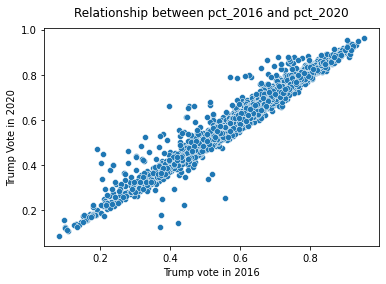

In [ ]:
sns.scatterplot(x = 'pct_2016', y = 'pct_2020', data = df_merged)
plt.xlabel("Trump vote in 2016")
plt.ylabel("Trump Vote in 2020")
plt.title('Relationship between pct_2016 and pct_2020', fontdict={'fontsize':12}, pad=12);



**Interpretation**

To explore the relationship between pct_2016 and pct_2020, I graphed them in a scatterplot. There are three important components to a scatterplot: direction, form, and strength of the relationship between two variables. As it can be  seen in the graph, there is a positive association between Trump Vote in 2016 and 2020, because as one variable increase so does the other. Second, the points on the scatterplot closely resemble a straight line suggesting the relationship between the two variables is linear. Lastly, the relationship between Trump Vote in 2016 and 2020 seems strong. The strongest linear relationship occurs when the slope is 1. In this case, the line formed by the points seems at approximately 45 degree angle, meaning the slope should be about 1. This means that when Trump Vote in 2016 increases by one, the Trump Vote in 2020 also increases by the same amount. Overall, the above suggests that a strong positive linear relationship between the two variables exist.

This is confirmed by the correlation coefficient of 0.979. Again, correlation is not causation. There may or may not be a causative connection between the two correlated variables.  

### Distribution of `pct_diff`

- Plot the distribution of `pct_diff`
- Also, create a density plot by `Region`
- Anything interesting?

I plot the distribution of pct_diff

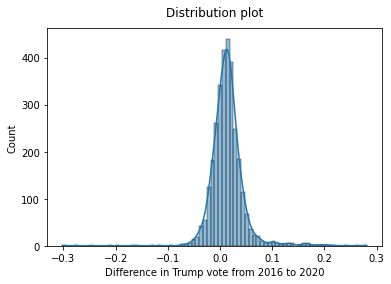

In [ ]:
sns.histplot(x = 'pct_diff', data = df_merged, kde = True, bins=80)
plt.xlabel("Difference in Trump vote from 2016 to 2020")
plt.title('Distribution plot', fontdict={'fontsize':12}, pad=12);

**Interpretation**

The x-axis shows the data value (difference in Trump Vote from 2016 to 2020) and the y-axis shows the relative frequency. The distribution is bell-shaped (i.e., a normal distribution), meaning the mean, median, and mode are all the same. The graph appears the same on both sides of this point.  The distribution is also unimodal as it only has one peak. The central tendency seems to be somewhere between 0.0 and 0.1. Pct_diff has relatively low variability, with few exceptions most of the scores are relatively close to the center. The heights of the bars follow the fitted distribution line closely, meaning the data fits the distribution well. 

I also create a density plot by Region

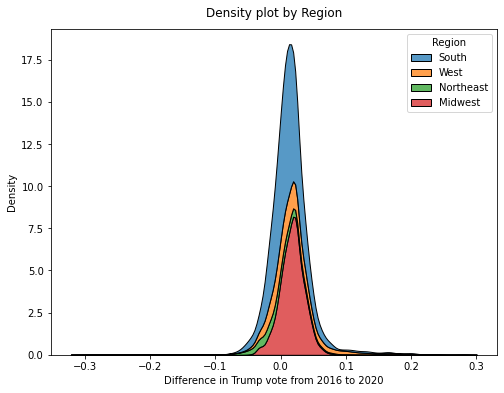

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x = "pct_diff", hue = 'Region',  multiple="stack",
                data = df_merged)
plt.xlabel("Difference in Trump vote from 2016 to 2020")
plt.title('Density plot by Region', fontdict={'fontsize':12}, pad=12);

**Interpretation**

This visualization shows intuitively that Southern Regions have a higher variance in electoral support for Trump from 2016 to 2020 than other any regions.

## Explore the vote change (15 percent)

- Suppose that you are interested in the relationship between `pct_diff` and following variables, `cases`, `deaths`, `Hispanic`, `White`, `Black`, `Income`, ( and maybe `pct_2016`, `pct_2020`)
- Explore the relationships through correlation analysis and visualisation. What do you find? For example:
    - What do you think is the strong determinant of the change in Trump vote percentage from 2016 to 2020?
    - The covid cases/deaths (per 1000) has any meaningful association with vote change?
    - What do you find about the race/ethnicity or income?

I explore the relationships between the following variables through a Seaborn Correlation Heatmap, as follows:

In [ ]:
tab_cor = df_merged.loc[:, ['pct_diff','cases', 'deaths', 'Income', 'Unemployment', 'Hispanic', 'White','Black']].corr()

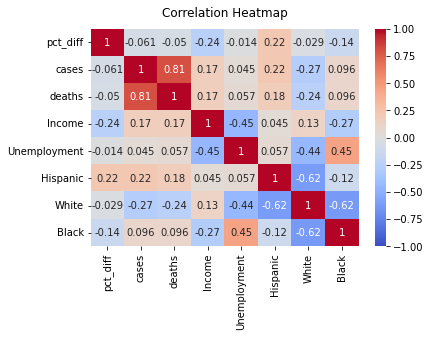

In [ ]:
heatmap= sns.heatmap(tab_cor, center = 0, cmap = 'coolwarm', vmin = -1, vmax = 1, annot= True)
np.fill_diagonal(tab_cor.values, 0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

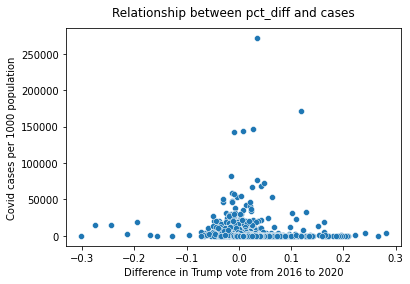

In [ ]:
sns.scatterplot(x = 'pct_diff', y = 'cases', data = df_merged)
plt.xlabel("Difference in Trump vote from 2016 to 2020")
plt.ylabel("Covid cases per 1000 population")
plt.title('Relationship between pct_diff and cases', fontdict={'fontsize':12}, pad=12);


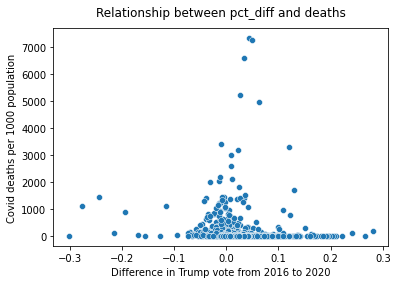

In [ ]:
sns.scatterplot(x = 'pct_diff', y = 'deaths', data = df_merged)
plt.xlabel("Difference in Trump vote from 2016 to 2020")
plt.ylabel("Covid deaths per 1000 population")
plt.title('Relationship between pct_diff and deaths', fontdict={'fontsize':12}, pad=12);


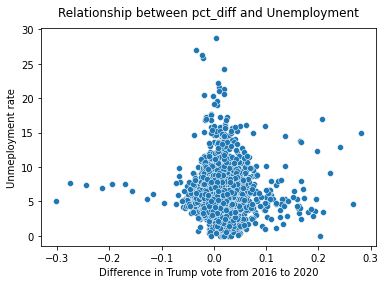

In [ ]:
sns.scatterplot(x = 'pct_diff', y = 'Unemployment', data = df_merged)
plt.xlabel("Difference in Trump vote from 2016 to 2020")
plt.ylabel("Unmeployment rate")
plt.title('Relationship between pct_diff and Unemployment', fontdict={'fontsize':12}, pad=12);


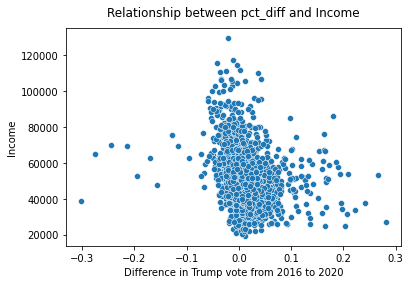

In [ ]:
sns.scatterplot(x = 'pct_diff', y = 'Income', data = df_merged)
plt.xlabel("Difference in Trump vote from 2016 to 2020")
plt.ylabel("Income")
plt.title('Relationship between pct_diff and Income', fontdict={'fontsize':12}, pad=12);


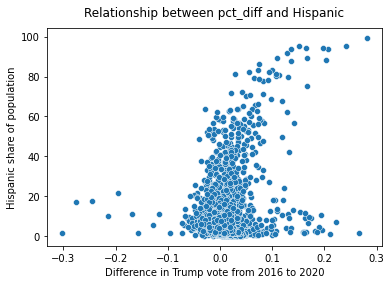

In [ ]:
sns.scatterplot(x = 'pct_diff', y = 'Hispanic', data = df_merged)
plt.xlabel("Difference in Trump vote from 2016 to 2020")
plt.ylabel("Hispanic share of population")
plt.title('Relationship between pct_diff and Hispanic', fontdict={'fontsize':12}, pad=12);


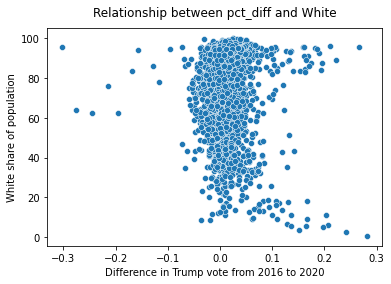

In [ ]:
sns.scatterplot(x = 'pct_diff', y = 'White', data = df_merged)
plt.xlabel("Difference in Trump vote from 2016 to 2020")
plt.ylabel("White share of population")
plt.title('Relationship between pct_diff and White', fontdict={'fontsize':12}, pad=12);


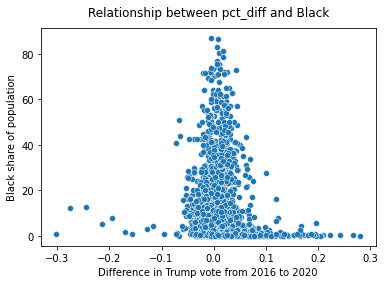

In [ ]:
sns.scatterplot(x = 'pct_diff', y = 'Black', data = df_merged)
plt.xlabel("Difference in Trump vote from 2016 to 2020")
plt.ylabel("Black share of population")
plt.title('Relationship between pct_diff and Black', fontdict={'fontsize':12}, pad=12);


**Interpretation**

First, let's explore the effect of the COVID-19 pandemic on the US presidential election. COVID-19 incidence (cases and deaths) is uncorrelated with changes in the Republican candidate vote share from 2016 to 2020 (correlation = -0.061 and 0.05 respectively). Similarly, there is no evidence that unemployment rate is related to electoral support for Trump (correlation = -0.014). 

Yet there is some evidence that Income might partially and negatively be associated with changes in vote percentage for Trump between 2016 and 2020 (weak negative correlation(-0.24)). This is confirmed graphically. Compared to the scatterplot with cases, for example, the points have some sort of direction. Specifically, there is a negative association because, in general, as vote percentage increases, income seems to decrease. However, the line is difficult to discern, suggesting that the relationship between change in Trump's electoral support and Income is weak. While COVID-19 incidence did not seem to have an average effect on voting intentions, the pandemic also caused a major economic downturn during that period. This may have further eroded the precarious economic situation of low-income voters, who consequently decreased support for the incumbent government compared to 2016. According to this logic, a lower income would lead to lower support for Trump in 2020.

In terms of race, Hispanic population has a weak positive correlation with pct_diff (0.22). As we will see later (Map of counties), this positive correlation might be due to the fact that voters in predominantly Hispanic counties in Southern and Western regions like Texas moved to the right in 2020 elections. Conversely, there is no evidence that White and Black are associated to pct_diff (correlation= -0.029, -0.14 respectively). 

In light of the above discussion, the strongest determinant of change in vote percentage for Trump from 2016 and 2020 seems to be income. However, it is worth noting that correlation is not causation. There may or may not be a causative connection between these variables.  


## Plot the election map (15 percent)

In this question, you are asked to plot `pct_diff` on a map of counties. The shapefile is available in `cb_2018_us_county_5m.zip`.

- In this exercise:
  - You need to install `geopandas`
  - You need to decompress the zip file
  - You have to use a meaningful color scheme
- Do you find anything interesting?

Note: 

- Merging shapefile data and vote data is tricky
  1. The `GEOID` in the map data is `fips` code in the election dataset
  2. However, these two cannot be directly merged because of type mismatch (The type of `GEOID` is object, and `fips` is `int`. So, before you merge the datasets, you need to change the type of variable (c.f. `.astype()`).


I install geopandas

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 46.1 MB/s 
     |████████████████████████████████| 16.7 MB 41.7 MB/s 


In [ ]:
import geopandas as gpd

Then, I decompress the zip file 

In [ ]:
!unzip /content/Data/cb_2018_us_county_5m.zip \
-d /content/const-shape
!ls /content/const-shape


Archive:  /content/Data/cb_2018_us_county_5m.zip
  inflating: /content/const-shape/cb_2018_us_county_5m.shp.ea.iso.xml  
  inflating: /content/const-shape/cb_2018_us_county_5m.shp.iso.xml  
  inflating: /content/const-shape/cb_2018_us_county_5m.shp  
  inflating: /content/const-shape/cb_2018_us_county_5m.shx  
  inflating: /content/const-shape/cb_2018_us_county_5m.dbf  
  inflating: /content/const-shape/cb_2018_us_county_5m.prj  
 extracting: /content/const-shape/cb_2018_us_county_5m.cpg  
cb_2018_us_county_5m.cpg  cb_2018_us_county_5m.shp.ea.iso.xml
cb_2018_us_county_5m.dbf  cb_2018_us_county_5m.shp.iso.xml
cb_2018_us_county_5m.prj  cb_2018_us_county_5m.shx
cb_2018_us_county_5m.shp


In [ ]:
df_map = gpd.read_file('/content/const-shape/cb_2018_us_county_5m.shp')
df_map

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
4,28,153,00695797,0500000US28153,28153,Wayne,06,2099745573,7255476,"POLYGON ((-88.94317 31.78421, -88.94335 31.824..."
...,...,...,...,...,...,...,...,...,...,...
3228,42,055,01213670,0500000US42055,42055,Franklin,06,2000048804,1547614,"POLYGON ((-78.09897 39.72247, -78.06930 39.748..."
3229,12,001,00308548,0500000US12001,12001,Alachua,06,2266324954,242877007,"POLYGON ((-82.65855 29.83014, -82.65149 29.825..."
3230,48,247,01383909,0500000US48247,48247,Jim Hogg,06,2942674729,92565,"POLYGON ((-98.95467 27.26940, -98.79809 27.268..."
3231,29,099,00758504,0500000US29099,29099,Jefferson,06,1700345322,20143587,"POLYGON ((-90.76280 38.29555, -90.75560 38.330..."


Before merging the datasets, I change GEOID into an int using the .astype()), as follows:





In [ ]:
df_map ['GEOID']  = df_map['GEOID'].astype(int)

In [ ]:
df_merged.rename({'fips': 'GEOID'}, axis = 1, inplace=True)

In [ ]:
df_polmap = df_map.merge(df_merged, on = 'GEOID')

Lastly, I plot pct_diff on a map of counties using a meaningful color scheme

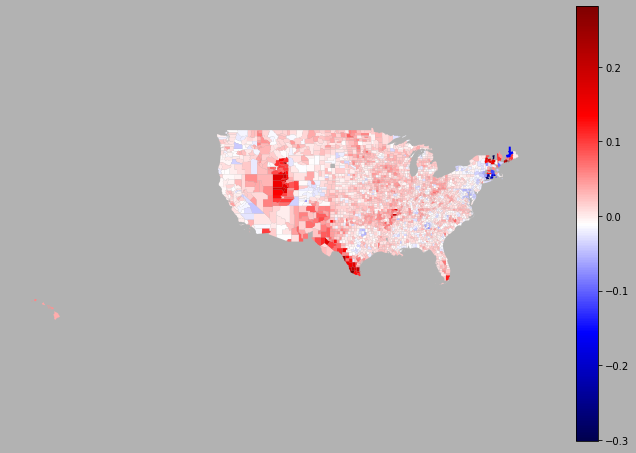

In [ ]:
pal="seismic"
fig, ax = plt.subplots(1,1, figsize = (12,8))
df_polmap.plot(ax = ax,edgecolor='none', column = 'pct_diff', legend = True, cmap = pal).set_axis_off()
fig.patch.set_facecolor('grey')
fig.patch.set_alpha(0.6)

#**Interpretation**

The map shows which counties experienced an increase and decrease in the number of votes for Trump compared to 2016.  Counties coloured white show little to no difference between the 2016 vote and the 2020 vote. Counties coloured red indicate growth in Republican vote shares compared to 2016. Counties coloured blue indicate a loss in Republican vote shares compared to 2016. The darker the shade of the colour, the larger the percentage change between the two elections. At first sight, most counties appear to have maintained their support for Trump. Compared to 2016, the Republican candidate appears to have found additional support across the country. Western and Southern counties (dark red areas) saw the greatest increase in popularity since 2016 (dark red areas), including a noticeable jump in majority-Hispanic areas (eg. Texas, Florida, New Mexico). For example, within Miami-Dade County, Trump seems to have gained a lot more votes than in 2016. Conversely, Voters in the Northeast (dark blue regions) appear to have reversed course, with a significant decline in percentage votes for Trump compared to 2016.  
